<a href="https://colab.research.google.com/github/JoshStrother/DataVisualization/blob/main/Exam1_JoshuaStrother_CPSMA4313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we need to authenticate and also I will import Pandas for tables.

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
import requests
import pandas as pa
from bs4 import BeautifulSoup


r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")

Okay now we will gather the table and display it.

In [ ]:
tables = html_soup.find_all('table',class_="wikitable")
tables[0].find_all('a')

[<a href="/wiki/Mount_Everest" title="Mount Everest">Mount Everest</a>,
 <a href="/wiki/Geography_of_Nepal" title="Geography of Nepal">Nepal</a>,
 <a href="/wiki/K2" title="K2">K2</a>,
 <a href="/wiki/Kangchenjunga" title="Kangchenjunga">Kangchenjunga</a>,
 <a href="/wiki/Lhotse" title="Lhotse">Lhotse</a>,
 <a href="/wiki/Makalu" title="Makalu">Makalu</a>,
 <a href="/wiki/Cho_Oyu" title="Cho Oyu">Cho Oyu</a>,
 <a href="/wiki/Dhaulagiri" title="Dhaulagiri">Dhaulagiri</a>,
 <a href="/wiki/Manaslu" title="Manaslu">Manaslu</a>,
 <a href="/wiki/Nanga_Parbat" title="Nanga Parbat">Nanga Parbat</a>,
 <a href="/wiki/Annapurna" title="Annapurna">Annapurna</a>,
 <a href="/wiki/Gasherbrum_I" title="Gasherbrum I">Gasherbrum I</a>,
 <a href="/wiki/Broad_Peak" title="Broad Peak">Broad Peak</a>,
 <a href="/wiki/Gasherbrum_II" title="Gasherbrum II">Gasherbrum II</a>,
 <a href="/wiki/Shishapangma" title="Shishapangma">Shishapangma</a>]

In [ ]:
df = pa.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


Next we want to display only the mountains in the 'Himalayas' Range.  I will use the .query method to do so.

In [ ]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


Next we will use the group by to plot the ranges by the number of times they appear in the tables using count().

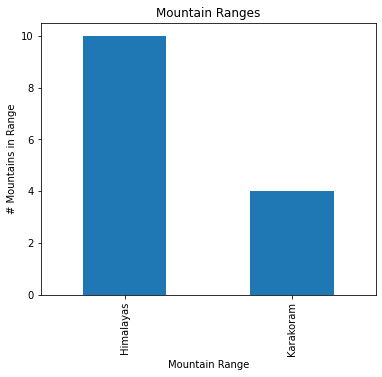

In [ ]:
dfg = df.groupby(['Range'])['Range'].count()
dfg.plot(kind='bar', title='Mountain Ranges', ylabel='# Mountains in Range',
         xlabel='Mountain Range', figsize=(6, 5))

After that we want to plot it as a box.

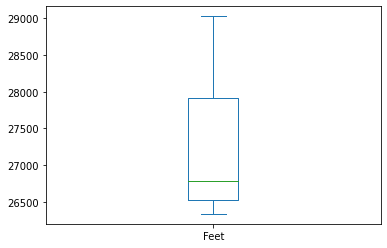

In [ ]:
df.Feet.plot(kind = 'box')

Now we want to find the mean, std, and the summary.  I will be using the .mean .std and .describe to accomplish this.

In [ ]:
df.Feet.mean()

27178.0

In [ ]:
df.Feet.std()

879.4895372622952

In [ ]:
df.Feet.describe()

count       14.000000
mean     27178.000000
std        879.489537
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29029.000000
Name: Feet, dtype: float64

Now we want to find the mean and median when grouped by range.  I will use the same type of method as above but instead it's the df.groupby 

In [ ]:
df.groupby(by = 'Range').agg(['mean','median'])

Metres             Feet         
              mean  median     mean   median
Range                                       
Himalayas  8319.70  8177.5  27295.6  26829.5
Karakoram  8194.25  8065.5  26884.0  26461.5

For the next part of the assignment we will use big query.
Firstly we are going to just peak at the data and see what we have.

In [21]:
%%bigquery --project data-viz-338716
SELECT*
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
LIMIT 5

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,3190243aa353d190bf2e5f366cd61617fa96f6a8,9d4a0cf00e9283302f40800a5da6e7017db07876ff895d...,2015-08-26 11:15:00+00:00,2015-08-26 11:15:00+00:00,0,0.0,None,None,None,None,5.85,1.46,0.0,0.0,7.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
1,6d5b6e5f3e5397f08e770beeb5f34433b0491d12,c2ca667849d5b9c2d10a15bf7e6a6ab358ab7a98cce37b...,2014-08-01 21:45:00+00:00,2014-08-01 21:45:00+00:00,0,0.0,None,None,None,None,8.45,0.00,0.0,0.0,8.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,980c986313ec13a9d59412826c83bfa65e01d0c3,60e9b32a85d0045d670d329891f51b9796543659769e9a...,2014-08-01 18:45:00+00:00,2014-08-01 18:45:00+00:00,0,0.0,None,None,None,None,6.05,2.00,0.0,0.0,8.05,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
3,29aea409062ff5c29c33fecff902acd8e58e5e0f,73f6888d8d8f9808f6624377edfa1e2a0a574b06eafbc9...,2014-07-31 09:45:00+00:00,2014-07-31 09:45:00+00:00,0,0.0,None,None,None,None,10.05,2.01,0.0,0.0,12.06,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
4,e83f8835694883f25c11fc70bdf8443b5c68448f,55af2e70fd4624a43fea70121974c54db44c8e7582ce3d...,2014-07-16 08:45:00+00:00,2014-07-16 08:45:00+00:00,0,0.0,None,None,None,None,3.25,0.00,0.0,1.0,4.25,Cash,Blue Ribbon Taxi Association Inc.,None,None,None,None,None,None


For the next part of B, we need to know how many rows are in the data set so we will use COUNT()

In [22]:
%%bigquery --project data-viz-338716
SELECT COUNT(*) as num_of_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,num_of_rows
0,198792903


Now we want the AVG trip total based on payment type.  So we will use AVG on trip total and GROUP BY payment.

In [23]:
%%bigquery --project data-viz-338716
SELECT AVG(trip_total) as avg_total, payment_type
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type

,avg_total,payment_type
0,15.836177,No Charge
1,16.639366,Way2ride
2,18.788039,Split
3,20.524892,Credit Card
4,20.320682,Prcard
5,17.649893,Unknown
6,20.339910,Mobile
7,15.496588,Dispute
8,10.116931,Pcard
9,12.265548,Cash


Now I will try to subquery to answer 3 of B.  How many trips were above avg.
EDIT:  I tried several different ways but can't seem to pull the data the way I need too.  I don't want to just put the direct answer in and compare because that isn't fun but it looks like thats what I will need to do in order to complete the question.

In [40]:
%%bigquery --project data-viz-338716
SELECT AVG(trip_total) as avg_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,avg_total
0,15.715129


In [44]:
%%bigquery --project data-viz-338716
SELECT COUNT(trip_total) as trips_above_avg
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_total != 0 AND trip_total > 15.715129

,trips_above_avg
0,49245785


(a) Approximately how long did you work on this exam?
I worked on this for maybe a little over 2 hours or so maybe more? Not sure I took a lot of breaks and read back over my other assignments mentioned at the bottom a few times.

(b) Which was the hardest and easiest topic from this section?
It was all relatively the same amount of effort for me.  But part B.3 would be the hardest to do without putting in the numbers manually. I still never got it.

(c) Which method of gathering data are you most excited to use again?
I like using big query and seeing the data pulled.  But I like pandas with beautiful soup and the way you can pull info from a site and make it the way you want.

Resources:

https://colab.research.google.com/drive/1rc5C66LJD3vQ7PC-MYnFP_d4TrXcktSE#scrollTo=gJqsmFfX_KoY // Authentication

https://colab.research.google.com/drive/1Ybf3xClOFp3RnvmQttS4TUQ4fO8Pl64j#scrollTo=ZThxzMIL78a8 //Pandas


I only used 2 of my former assignments to complete this exam.  They had everything I needed.

I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course